In [1]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__


#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, precision_recall_curve
#from sklearn.metrics import recall_score, classification_report, auc, roc_curve
#from sklearn.metrics import precision_recall_fscore_support, f1_score
#from sklearn.preprocessing import StandardScaler
from pylab import rcParams
tf.__version__

Using TensorFlow backend.


'1.8.0'

# Model Name

In [2]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

# Choose default months & paths, columns(features) and number of loans to load, train/test split

In [3]:
default_months = 6
nrows = 1000000
train_split = 0.80
model = keras
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000

column_list = ['abs_loan.originationdate', 'abs_loan.originalloanamount','abs_loan.originalloanterm',
'abs_loan.originalinterestratepercentage','abs_loan.subvented','abs_loan.vehiclenewusedcode','abs_loan.vehiclevalueamount',
'abs_loan.obligorcreditscore','abs_loan.obligorincomeverificationlevelcode','abs_loan.obligoremploymentverificationcode',
'abs_loan.paymenttoincomepercentage','abs_loan.remainingtermtomaturitynumber',
'abs_loan.reportingperiodbeginningloanbalanceamount','abs_loan.nextreportingperiodpaymentamountdue',
'abs_loan.reportingperiodinterestratepercentage','abs_loan.nextinterestratepercentage',
'abs_loan.servicingfeepercentage','abs_loan.otherservicerfeeretainedbyservicer',
'abs_loan.otherassesseduncollectedservicerfeeamount','abs_loan.scheduledinterestamount', 
'abs_loan.scheduledprincipalamount','abs_loan.otherprincipaladjustmentamount',
'abs_loan.reportingperiodactualendbalanceamount','abs_loan.reportingperiodscheduledpaymentamount',
'abs_loan.totalactualamountpaid','abs_loan.actualinterestcollectedamount','abs_loan.actualprincipalcollectedamount',
'abs_loan.actualothercollectedamount','abs_loan.serviceradvancedamount', 'abs_loan.currentdelinquencystatus']

# GPU Options

In [4]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Load data

In [5]:
df=pd.read_csv(path+'datasets/s3tab/abs_loan.csv', 
               #usecols=column_list, 
               sep='\t',
               nrows=nrows,
               low_memory=False, 
              index_col='abs_loan.originationdate', 
               parse_dates=True
              )
print(df.shape)
df.dtypes

(1000000, 73)


abs_loan.cik                                            int64
abs_loan.accessionnumber                               object
abs_loan.assettypenumber                               object
abs_loan.assetnumber                                   object
abs_loan.reportingperiodbeginningdate                  object
abs_loan.reportingperiodendingdate                     object
abs_loan.originatorname                                object
abs_loan.originalloanamount                           float64
abs_loan.originalloanterm                               int64
abs_loan.loanmaturitydate                              object
abs_loan.originalinterestratepercentage               float64
abs_loan.interestcalculationtypecode                    int64
abs_loan.originalinterestratetypecode                   int64
abs_loan.originalinterestonlytermnumber               float64
abs_loan.originalfirstpaymentdate                      object
abs_loan.underwritingindicator                           bool
abs_loan

In [6]:
df.head()

,abs_loan.cik,abs_loan.accessionnumber,abs_loan.assettypenumber,abs_loan.assetnumber,abs_loan.reportingperiodbeginningdate,abs_loan.reportingperiodendingdate,abs_loan.originatorname,abs_loan.originalloanamount,abs_loan.originalloanterm,abs_loan.loanmaturitydate,...,abs_loan.repurchaseamount,abs_loan.demandresolutiondate,abs_loan.repurchasername,abs_loan.repurchasereplacementreasoncode,abs_loan.chargedoffprincipalamount,abs_loan.recoveredamount,abs_loan.modificationtypecode,abs_loan.paymentextendednumber,abs_loan.repossessedindicator,abs_loan.repossessedproceedsamount
abs_loan.originationdate,,,,,,,,,,,,,,,,,,,,,
2012-12-31,1725617,0000929638-18-000030,BMW2018-A,1001536189,2017-11-01,2017-11-30,BMW Bank of North America,25124.50,72,2018-12-31,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2012-12-31,1725617,0000929638-18-000030,BMW2018-A,1001536759,2017-11-01,2017-11-30,BMW Bank of North America,43257.34,72,2019-01-31,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2012-12-31,1725617,0000929638-18-000030,BMW2018-A,1001536970,2017-11-01,2017-11-30,BMW Bank of North America,56917.54,72,2019-01-31,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2012-12-31,1725617,0000929638-18-000030,BMW2018-A,1001537061,2017-11-01,2017-11-30,BMW Bank of North America,42003.57,72,2018-12-31,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2012-12-31,1725617,0000929638-18-000030,BMW2018-A,1001537088,2017-11-01,2017-11-30,BMW Bank of North America,77217.85,72,2019-01-31,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0


In [7]:
df.columns=df.columns.str.replace('abs_loan.','')

# Function to Draw Bar chart

In [19]:
def draw(df, title, ylabel):
    labels = pd.value_counts(df).index.tolist()
    count_classes = pd.value_counts(df, sort = True)
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print(pd.value_counts(df))

# Origination date

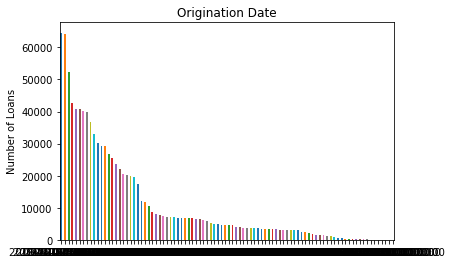

2016-12-31    64578
2016-10-31    64272
2017-01-31    52433
2016-08-31    42815
2016-09-30    40922
2017-04-30    40713
2017-03-31    40303
2017-05-31    39985
2016-11-30    36773
2017-09-30    32881
2017-10-31    30065
2017-08-31    29296
2016-07-31    29096
2017-02-28    26752
2016-05-31    25524
2016-06-30    23782
2017-11-30    22231
2017-07-31    20604
2017-06-30    20330
2018-05-31    19960
2018-04-30    19525
2016-04-30    17254
2016-03-31    12062
2018-03-31    11635
2017-12-31    10692
2015-12-31     8650
2015-10-31     7978
2016-01-31     7806
2014-04-30     7480
2013-07-31     7257
              ...  
2014-06-30     3054
2015-02-28     2923
2014-10-31     2920
2014-02-28     2916
2012-11-30     2513
2012-04-30     2298
2012-10-31     1982
2012-08-31     1697
2012-09-30     1596
2012-02-29     1569
2012-07-31     1415
2012-05-31     1189
2012-06-30     1159
2018-01-31     1005
2012-01-31      547
2011-12-31      427
2011-11-30      203
2011-08-31      163
2011-10-31      157


In [20]:
draw(df.index, title='Origination Date', ylabel='Number of Loans')

# CIK Number

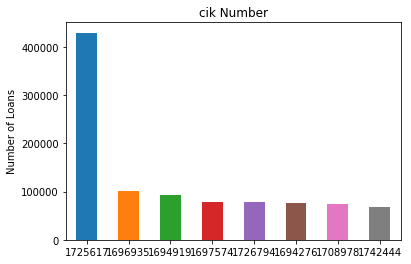

1725617    429753
1696935    100512
1694919     93151
1697574     79235
1726794     79166
1694276     76690
1708978     74302
1742444     67191
Name: cik, dtype: int64


In [21]:
draw(df.cik, title='cik Number', ylabel='Number of Loans')

# Accession Number

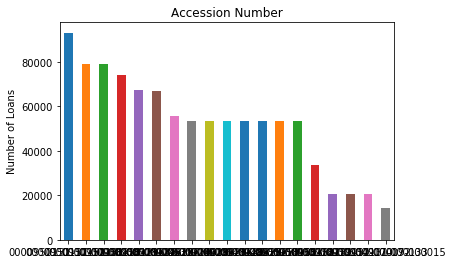

0000950131-17-000068    93151
0000950131-17-000083    79235
0000950131-18-000011    79166
0000950131-18-000048    74302
0000950123-18-006317    67191
0000950131-17-000040    66797
0000929638-18-000030    55710
0000929638-18-000431    53447
0000929638-18-000483    53443
0000929638-18-000552    53442
0000929638-18-000589    53440
0000929638-18-000653    53437
0000929638-18-000727    53436
0000929638-18-000790    53398
0000950131-18-000049    33715
0000950131-17-000070    20737
0000950131-17-000092    20737
0000950131-17-000133    20737
0000950131-17-000015    14479
Name: accessionnumber, dtype: int64


In [22]:
draw(df.accessionnumber, title='Accession Number', ylabel='Number of Loans')

# Asset Type Number

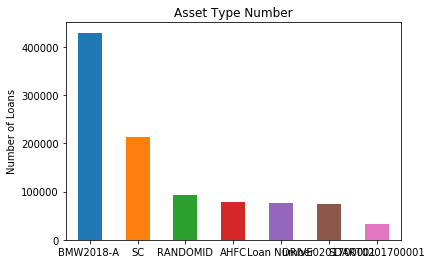

BMW2018-A          429753
SC                 213154
RANDOMID            93151
AHFC                79235
Loan Number         76690
DRIVE0201700001     74302
SDART0201700001     33715
Name: assettypenumber, dtype: int64


In [24]:
draw(df.assettypenumber, title='Asset Type Number', ylabel='Number of Loans')

# Reporting Period Beginning Date

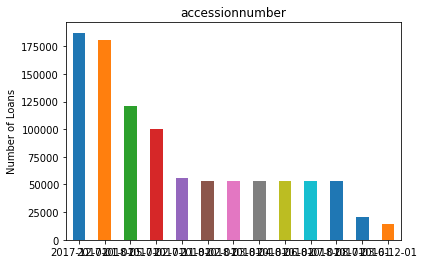

2017-12-01    187183
2017-01-01    180685
2018-05-01    120631
2017-02-01     99972
2017-11-01     55710
2018-02-01     53447
2018-03-01     53443
2018-04-01     53442
2018-06-01     53437
2018-07-01     53436
2018-08-01     53398
2017-03-01     20737
2016-12-01     14479
Name: reportingperiodbeginningdate, dtype: int64


In [25]:
draw(df.reportingperiodbeginningdate, title='accessionnumber', ylabel='Number of Loans')

# Originators Name

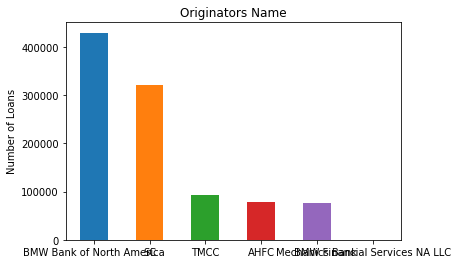

BMW Bank of North America        429348
SC                               321171
TMCC                              93151
AHFC                              79235
Mechanics Bank                    76690
BMW Financial Services NA LLC       405
Name: originatorname, dtype: int64


In [26]:
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans')

# Original Loan Amount

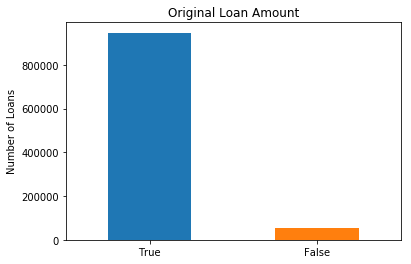

True     947379
False     52621
Name: originalloanamount, dtype: int64


In [27]:
draw(df.originalloanamount>10000, title='Original Loan Amount', ylabel='Number of Loans')

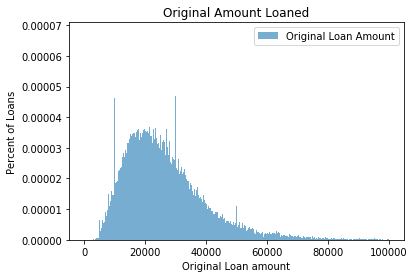

In [28]:
bins = np.linspace(0, 100000, 1000)
plt.hist(df.originalloanamount, bins, alpha=0.6, density=True, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Percent of Loans')
plt.show()

In [29]:
df.originalloanamount.describe()

count    1000000.000000
mean       26798.861306
std        14203.851901
min         1624.630000
25%        16930.812500
50%        24021.030000
75%        33227.800000
max       189984.120000
Name: originalloanamount, dtype: float64

# Orignial Loan Term

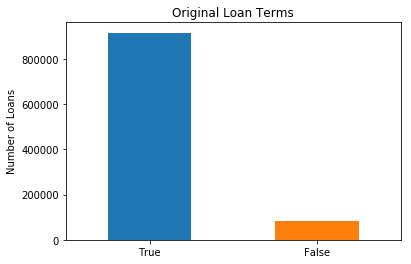

True     916351
False     83649
Name: originalloanterm, dtype: int64


In [30]:
draw(df.originalloanterm>48, title='Original Loan Terms', ylabel='Number of Loans')

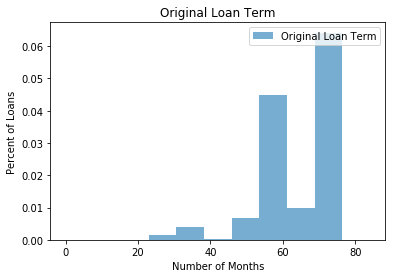

In [31]:
bins = np.linspace(0, 84, 12)
plt.hist(df.originalloanterm, bins, alpha=0.6, density=True, label='Original Loan Term')
plt.legend(loc='upper right')
plt.title("Original Loan Term")
plt.xlabel('Number of Months')
plt.ylabel('Percent of Loans')
plt.show()

In [ ]:
df.originalloanterm.describe()

# Loan Maturity Date

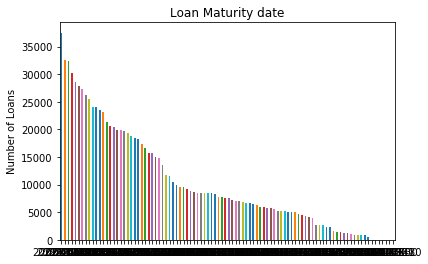

2022-10-31    37521
2022-12-31    32529
2023-01-31    32440
2022-11-30    30297
2023-05-31    28633
2021-09-30    27933
2021-10-31    27237
2022-09-30    26194
2023-04-30    25599
2022-05-31    24103
2021-08-31    24049
2023-03-31    23597
2022-08-31    23162
2022-06-30    21423
2021-11-30    20601
2022-07-31    20436
2022-04-30    19969
2021-06-30    19871
2024-05-31    19632
2021-07-31    19372
2023-10-31    18777
2022-01-31    18530
2021-12-31    18342
2023-02-28    17372
2022-03-31    16561
2021-05-31    15785
2023-11-30    15666
2022-02-28    14980
2023-12-31    14734
2023-06-30    13638
              ...  
2019-01-31     4989
2018-09-30     4961
2018-12-31     4604
2018-11-30     4529
2019-02-28     4316
2018-10-31     4102
2018-04-30     3975
2024-08-31     2758
2018-03-31     2636
2024-02-29     2591
2024-07-31     2257
2024-01-31     2246
2017-09-30     1558
2017-12-31     1474
2018-01-31     1456
2017-11-30     1262
2017-10-31     1218
2018-02-28     1138
2017-06-30      865


In [32]:
draw(df.loanmaturitydate, title='Loan Maturity date', ylabel='Number of Loans')

# Original interest rate percentage below 2%

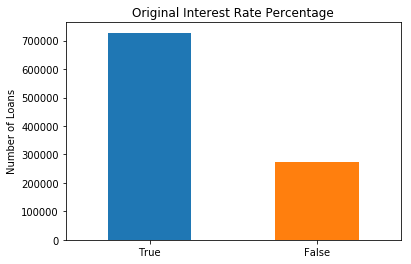

True     727774
False    272226
Name: originalinterestratepercentage, dtype: int64


In [33]:
draw(df.originalinterestratepercentage<2.0, title='Original Interest Rate Percentage', ylabel='Number of Loans')

In [41]:
df.originalinterestratepercentage.describe()

count    1000000.00000
mean           1.68655
std            2.45960
min            0.00000
25%            0.13900
50%            0.90000
75%            2.90000
max           22.99000
Name: originalinterestratepercentage, dtype: float64

# No interest rate loans

In [44]:
y=pd.value_counts(df.originalinterestratepercentage==0)
print('No interest rate for',y[1],'loans')

No interest rate for 35504 loans


# Underwriting Indicator

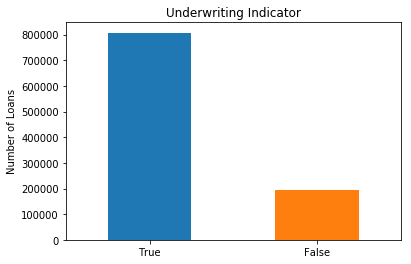

True     807471
False    192529
Name: underwritingindicator, dtype: int64


In [34]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans')

# Create Feature Column for Underwriting TRUE

In [51]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

# Subvented

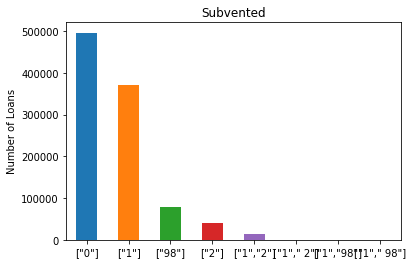

["0"]          496121
["1"]          371715
["98"]          79424
["2"]           39308
["1","2"]       12818
["1"," 2"]        590
["1","98"]         14
["1"," 98"]        10
Name: subvented, dtype: int64


In [35]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans')

In [55]:
df.subvented.describe(include='all')

count     1000000
unique          8
top         ["0"]
freq       496121
Name: subvented, dtype: object

# Create Feature Column for Subvented

In [59]:
def map_subvented_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == '["0"]':
            return 0
        else:
            return 1
        
df['subvented_true'] = list(map(map_subvented_true, df.subvented))
df.drop(['subvented'], axis=1, inplace=True)
pd.value_counts(df.subvented_true)

1    503879
0    496121
Name: subvented_true, dtype: int64

# Vehicle New or Used code

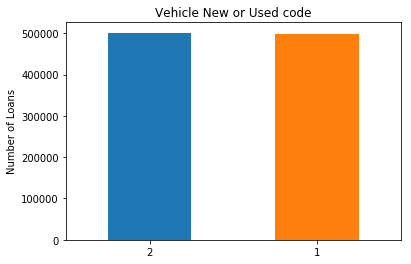

2    501388
1    498612
Name: vehiclenewusedcode, dtype: int64


In [36]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans')

# Create Feature Column for New or Used

In [61]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

0    501388
1    498612
Name: vehiclenew_true, dtype: int64

# Vehicle Type code

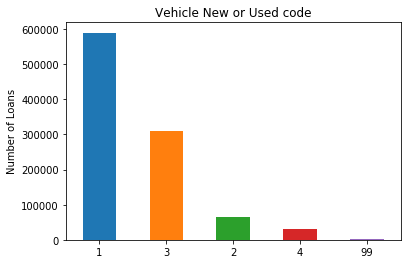

1     589775
3     311098
2      66274
4      31469
99      1384
Name: vehicletypecode, dtype: int64


In [37]:
draw(df.vehicletypecode, title='Vehicle New or Used code', ylabel='Number of Loans')

In [62]:
df.vehicletypecode.describe()

count    1000000.000000
mean           1.918509
std            3.747289
min            1.000000
25%            1.000000
50%            1.000000
75%            3.000000
max           99.000000
Name: vehicletypecode, dtype: float64

In [ ]:
#

# Obligor Credit Score Type

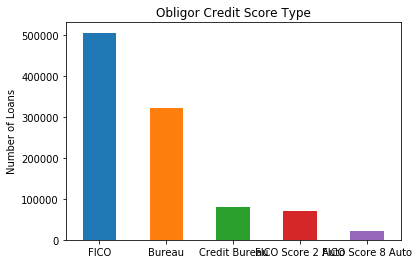

FICO                 506443
Bureau               321171
Credit Bureau         79235
FICO Score 2 Auto     71401
FICO Score 8 Auto     21750
Name: obligorcreditscoretype, dtype: int64


In [38]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans')

In [63]:
df.obligorcreditscoretype.describe()

count     1000000
unique          5
top          FICO
freq       506443
Name: obligorcreditscoretype, dtype: object

In [64]:
pd.value_counts(df.obligorcreditscoretype==0)

False    1000000
Name: obligorcreditscoretype, dtype: int64

# Obligor Credit Score

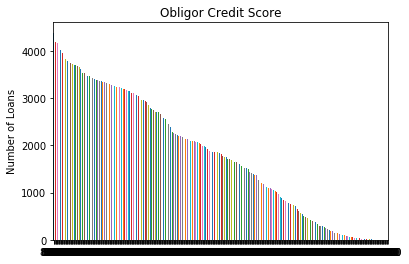

825.0    4386
677.0    4278
818.0    4199
831.0    4197
827.0    4197
817.0    4186
826.0    4161
824.0    4160
816.0    4107
830.0    4059
834.0    4037
828.0    4022
833.0    4002
805.0    3961
822.0    3946
815.0    3930
836.0    3867
820.0    3835
814.0    3830
812.0    3827
853.0    3801
821.0    3800
842.0    3792
832.0    3771
705.0    3769
837.0    3754
747.0    3749
738.0    3740
810.0    3740
823.0    3737
         ... 
399.0      10
397.0       7
402.0       7
389.0       7
398.0       7
395.0       7
393.0       6
385.0       5
384.0       5
391.0       4
387.0       4
396.0       3
374.0       3
380.0       3
378.0       3
383.0       3
375.0       2
373.0       2
370.0       2
381.0       1
390.0       1
377.0       1
386.0       1
372.0       1
371.0       1
388.0       1
366.0       1
363.0       1
359.0       1
382.0       1
Name: obligorcreditscore, Length: 533, dtype: int64


In [39]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans')

In [40]:
df.obligorcreditscore.describe()

count    956434.000000
mean        717.122269
std         106.919954
min           0.000000
25%         639.000000
50%         730.000000
75%         806.000000
max         900.000000
Name: obligorcreditscore, dtype: float64

# zero credit score loans

In [ ]:
y=pd.value_counts(df.obligorcreditscore==0)
print('No Credit score for',y[1],'loans')

# Unfilled Credit Score

In [ ]:
df.obligorcreditscore.fillna(0, inplace=True)
y=pd.value_counts(df.obligorcreditscore==0)
print('No Credit score for',y[1],'loans')

# Remove rows with no credit score

In [66]:
df.obligorcreditscore.replace(0, np.nan, inplace=True)
df.obligorcreditscore.dropna(axis=0,inplace=True)

In [67]:
df.shape

(1000000, 74)

# Obligor Income Verification Level Code

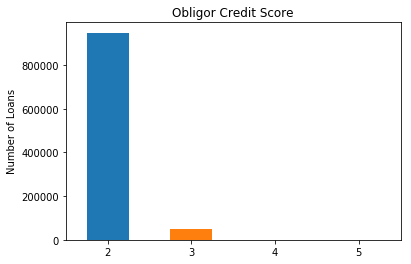

2    948466
3     51397
4       116
5        21
Name: obligorincomeverificationlevelcode, dtype: int64


In [68]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans')

In [69]:
df.obligorincomeverificationlevelcode.describe()

count    1000000.000000
mean           2.051692
std            0.222212
min            2.000000
25%            2.000000
50%            2.000000
75%            2.000000
max            5.000000
Name: obligorincomeverificationlevelcode, dtype: float64

In [70]:
pd.value_counts(df.obligorincomeverificationlevelcode==0)

False    1000000
Name: obligorincomeverificationlevelcode, dtype: int64

# Create Feature Columns for Obligor Income Verification Code 2,3,4 and 5

In [73]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))


1    948466
0     51534
Name: income_2, dtype: int64

In [77]:
pd.value_counts(df.income_2)

1    948466
0     51534
Name: income_2, dtype: int64

In [74]:
pd.value_counts(df.income_3)

0    948603
1     51397
Name: income_3, dtype: int64

In [75]:
pd.value_counts(df.income_4)

0    999884
1       116
Name: income_4, dtype: int64

In [76]:
pd.value_counts(df.income_5)

0    999979
1        21
Name: income_5, dtype: int64

In [78]:
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)

# Obligor Employment Verification Code

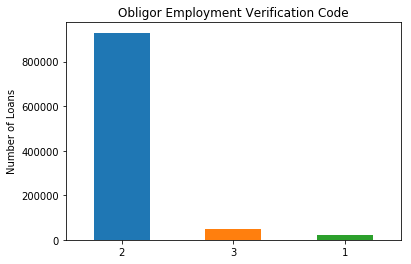

2    929732
3     49247
1     21021
Name: obligoremploymentverificationcode, dtype: int64


In [81]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans')

In [82]:
pd.value_counts(df.obligoremploymentverificationcode==0)

False    1000000
Name: obligoremploymentverificationcode, dtype: int64

In [83]:
df.obligoremploymentverificationcode.describe()

count    1000000.000000
mean           2.028226
std            0.263574
min            1.000000
25%            2.000000
50%            2.000000
75%            2.000000
max            3.000000
Name: obligoremploymentverificationcode, dtype: float64

# Create feature Columns for obligor employment verification code 1,2 and 3

In [84]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['employment_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))


In [85]:
pd.value_counts(df.employment_1)

0    978979
1     21021
Name: employment_1, dtype: int64

In [86]:
pd.value_counts(df.employment_2)

1    929732
0     70268
Name: employment_2, dtype: int64

In [87]:
pd.value_counts(df.employment_3)

0    950753
1     49247
Name: employment_3, dtype: int64

In [88]:
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)

# Obligor Employment Verification Code

In [ ]:
pd.value_counts(df.obligoremploymentverificationcode)

In [ ]:
pd.value_counts(df.reportingperiodactualendbalanceamount)

In [ ]:
pd.value_counts(df.totalactualamountpaid)

In [ ]:
pd.value_counts(df.actualinterestcollectedamount)

In [ ]:
pd.value_counts(df.actualprincipalcollectedamount)

In [ ]:
pd.value_counts(df.interestpaidthroughdate)

In [ ]:
pd.value_counts(df.currentdelinquencystatus)

In [ ]:
pd.value_counts(df.chargedoffprincipalamount)

In [ ]:
pd.value_counts(df.recoveredamount)

In [ ]:
pd.value_counts(df.repossessedindicator)

In [ ]:
pd.value_counts(df.repossessedproceedsamount)

# Clean data

In [ ]:
# change columns to lower case and remove prefix to enable pandas to work
column_list=[x.lower() for x in (column_list)]
df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [ ]:
df.isnull().values.any()

# Loan Statistics

In [ ]:
df.describe()

# Current Vs Other Buckets

In [ ]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [ ]:
pd.value_counts(df.currentdelinquencystatus)

# Label Creation

In [ ]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > default_months:
            return 1
        elif column <= default_months:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

# Loan Balance Amount at the End of Reporting Period

In [ ]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, density=True, label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, density=True, label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Percent of Loans')
plt.show()

#  Clean up for Machine Learning

In [ ]:
df.fillna(0, inplace=True)
df=df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.head()

# Preparing data for Machine Learning

In [ ]:
# prepare label
Y=df.label.values
Y.shape

In [ ]:
# reshape labels for machine learning
Y=Y.reshape(Y.shape[0],1)
Y.shape

In [ ]:
# prepare input data
input=df.values
input.shape

In [ ]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

In [ ]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [ ]:
#drop unneeded columns for creating input data
df.drop(['currentdelinquencystatus','label'], axis=1, inplace=True)

In [ ]:
#reshape input data for machine learning
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

In [ ]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]

# Normalize input data

In [ ]:
x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
x_train_keras_scaled.shape

# Model Architecture

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(254, activation='relu', input_shape=(x_train_keras_scaled.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.GRU(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)


# Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

# Train the Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1, validation_data=(x_test_keras_scaled, y_test), 
        # callbacks = [
   # baseLogger,
    #history,
    #tensorboard
    #learningRateScheduler,
    #reduceLROnPlateau
     #    ], 
          shuffle=False
)


# Save the Model

In [ ]:
model.save(path+'model/'+name+'.h5')

In [ ]:
test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

# Load Saved Model

In [ ]:
saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)